# Titanic - Machine Learning from Disaster

## Imports

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Global config

In [2]:
train_csv = "train.csv"
test_csv = "test.csv"

## Load data

In [3]:
train_data = pd.read_csv(train_csv, index_col=['PassengerId'])
test_data = pd.read_csv(test_csv, index_col=['PassengerId'])
combined_data = [train_data, test_data]

## Data Exploration

In [4]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Train data columns

In [5]:
train_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Test data columns

In [7]:
test_data.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

### Data dictionary

#### Categorical features

- Survived - Survival - 0 = No, 1 = Yes - **Used for evaluating whether a person survived**
- Sex - Sex 	
- Embarked - Port of Embarkation - C = Cherbourg, Q = Queenstown, S = Southampton

#### Ordinal

- Pclass - Ticket class - 1 = 1st, 2 = 2nd, 3 = 3rd

#### Numerical features

##### Discrete

- SibSp - # of siblings / spouses aboard the Titanic 	
- Parch - # of parents / children aboard the Titanic 

##### Continuous

- Age - Age in years 		
- Fare - Passenger fare 

#### Mixed/Error-prone/Unused

- PassengerId - Id of person
- Name - Name of Passenger
- Ticket - Ticket number 
- Cabin - Cabin number

### Null values analysis

In [8]:
train_data.info()
print('_'*42)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
__________________________________________
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418

**Cabin** feature will be dropped due to the high frequency of missing values.

### Categorical feature distribution

In [9]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Ford, Mr. William Neal",male,347082,G6,S
freq,1,577,7,4,644


In [10]:
test_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Hocking, Miss. Ellen Nellie""""",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


Due to the high duplicate ratio in **Ticket** feature, I have decided to drop it from my classifier.

### Numerical feature distribution

In [11]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
test_data.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


### Pivoting features

In [13]:
train_data[["Pclass", "Survived"]].groupby("Pclass", as_index = False).mean().sort_values(by="Survived", ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [14]:
train_data[["Sex", "Survived"]].groupby("Sex", as_index = False).mean().sort_values(by="Survived", ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [15]:
train_data[["Embarked", "Survived"]].groupby("Embarked", as_index = False).mean().sort_values(by="Survived", ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [16]:
train_data[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [17]:
train_data[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Data preparation

Analyze title of people and engineer a new feature

In [18]:
for dataset in [train_data, test_data]:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Combine minority titles

In [19]:
for dataset in combined_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


Attempt to replace missing values for Age, Embarked and Fare using median

In [20]:
age_mean = train_data['Age'].mean()
age_std = train_data['Age'].std()

for data in [train_data, test_data]:
    age_nullcount = data['Age'].isnull().sum()
    random_age = np.random.randint(age_mean - age_std, age_mean + age_std, size = age_nullcount)
    data['Age'][np.isnan(data['Age'])] = random_age

<ipython-input-20-4fb336fa6d88>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'][np.isnan(data['Age'])] = random_age


In [21]:
embarked_mode = str(train_data["Embarked"].mode()[0])
train_data["Embarked"].fillna(embarked_mode, inplace = True)
test_data["Embarked"].fillna(embarked_mode, inplace = True)

In [22]:
fare_median = train_data["Fare"].median()
train_data["Fare"].fillna(fare_median, inplace = True)
test_data["Fare"].fillna(fare_median, inplace = True)

Encode categorical features

In [23]:
mapping = dict()

for i in [3, 10, 11]:
    col_name = train_data.columns[i]
    mapping[col_name] = dict()
    classes = list(set(train_data.iloc[:, i]))
    for j in range(len(classes)):
        mapping[col_name][classes[j]] = j
        
mapping

{'Sex': {'male': 0, 'female': 1},
 'Embarked': {'Q': 0, 'C': 1, 'S': 2},
 'Title': {'Mr': 0, 'Miss': 1, 'Rare': 2, 'Mrs': 3, 'Master': 4}}

In [24]:
train_data.replace(mapping, inplace = True)
test_data.replace(mapping, inplace = True)

Dropping features as specified above

In [25]:
train_data = train_data.drop(['Ticket', 'Cabin', 'Name'], axis=1)
test_data = test_data.drop(['Ticket', 'Cabin', 'Name'], axis=1)

Final result

### Correlation analysis

<AxesSubplot:>

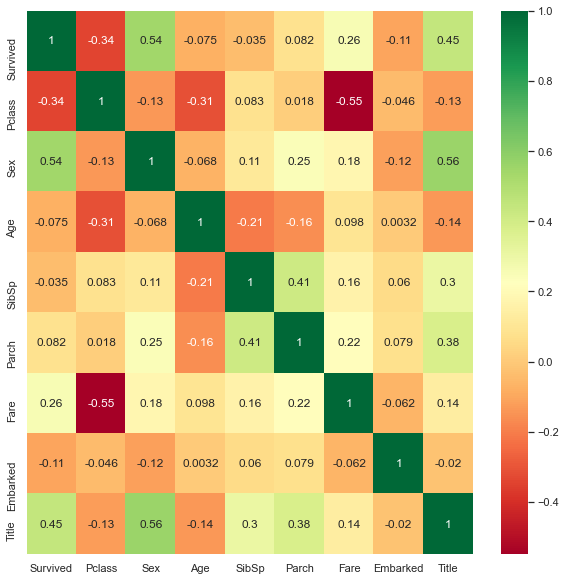

In [26]:
sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(train_data.corr(), annot=True, cbar=True, cmap="RdYlGn")

Sex, Title and Fare are highly correlated to Survival as seen above

### Final data preparations

In [27]:
Y_train = train_data["Survived"]
X_train = train_data.drop(['Survived'], axis=1)
X_test = test_data

## Experiments

### Prepare models

In [28]:
models = {
    "LogisticRegression" : LogisticRegression(),
    "RandomForestClassifier" : RandomForestClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "GaussianNB": GaussianNB(),
    "SGDClassifier": SGDClassifier(),
    "Perceptron": Perceptron(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier()
}

stack = list()
stack.append(("LogisticRegression", LogisticRegression()))
stack.append(("GaussianNB", GaussianNB()))
stack.append(("GradientBoostingClassifier", GradientBoostingClassifier()))
stack.append(("RandomForestClassifier", RandomForestClassifier()))
stack.append(("KNeighborsClassifier", KNeighborsClassifier()))
stack.append(("SGDClassifier", SGDClassifier()))
stack.append(("DecisionTreeClassifier", DecisionTreeClassifier()))

stacked_model = VotingClassifier(estimators = stack, voting = 'hard',
            weights=[1, 1, 1, 2, 1, 0.5, 1])

models["VotingClassifier"] = stacked_model

### Prepare KFold Validation

In [29]:
def k_fold_fit_and_evaluate(X, y, model, scoring_method, n_splits=5):
    cv = KFold(n_splits=n_splits, random_state=42, shuffle=True)
    scores = cross_validate(model, X, y, scoring=scoring_method, cv=cv, n_jobs=-1)
      
    return scores["test_score"]

In [30]:
scoring_method_accuracy = make_scorer(lambda prediction, true_target: accuracy_score(prediction, true_target))

print("10 KFold mean accuracy on untuned parameters:\n")
for name, model in models.items():
    print(name)
    metrics_accuracy = k_fold_fit_and_evaluate(X_train, Y_train, model, scoring_method_accuracy) 
    print("Accuracy_mean:", np.mean(metrics_accuracy))
    print()

10 KFold mean accuracy on untuned parameters:

LogisticRegression
Accuracy_mean: 0.8159814198732033

RandomForestClassifier
Accuracy_mean: 0.8170296905404557

KNeighborsClassifier
Accuracy_mean: 0.7183102127926684

GaussianNB
Accuracy_mean: 0.8170736300295023

SGDClassifier
Accuracy_mean: 0.7576737179084803

Perceptron
Accuracy_mean: 0.7126671269851234

DecisionTreeClassifier
Accuracy_mean: 0.7799824242043814

GradientBoostingClassifier
Accuracy_mean: 0.8305442219571905

VotingClassifier
Accuracy_mean: 0.8249011361496453



### Perform hyper parameter tuning

Prepare parameters

In [31]:
random_state = 42
n_splits = 5
scoring_method = make_scorer(lambda true_target, prediction: accuracy_score(true_target, prediction))

model_parameters = {
    "LogisticRegression" : {
        'penalty' : ['l1', 'l2', 'elasticnet', 'none'], 
        'C' : [1, 10, 20, 50], 
        'random_state' : [random_state]
    },
    "RandomForestClassifier": {
        'random_state': [random_state],
        'min_samples_leaf' : [2, 10, 20, 50, 70, 100],
        'min_samples_split' : [2, 10, 20, 50, 70, 100],
        'max_depth': [2, 10, 20, 50, 70, 100]
    },
    "KNeighborsClassifier": {
        'n_neighbors' : [10, 20, 30, 40, 50], 
    },
    "GaussianNB": {
    
    },
    "SGDClassifier" : {
        'penalty' : ['l1', 'l2', 'elasticnet', 'none'], 
        'random_state' : [random_state]
    },
    "Perceptron" : {
        'penalty' : ['l1', 'l2', 'elasticnet', 'none'], 
        'random_state' : [random_state]
    },
    "DecisionTreeClassifier": {
        'random_state': [random_state],
        'min_samples_leaf' : [2, 10, 20, 50, 70, 100],
        'min_samples_split' : [2, 10, 20, 50, 70, 100],
        'max_depth': [2, 10, 20, 50, 70, 100]
    },
    "GradientBoostingClassifier": {
        'random_state': [random_state],
        'min_samples_leaf' : [2, 10, 20, 50, 70, 100],
        'min_samples_split' : [2, 10, 20, 50, 70, 100],
        'max_depth': [2, 10, 20, 50, 70, 100]
    }
}

Perform the tuning

In [32]:
bestHyper = dict()
for model_name, parameters in model_parameters.items():
    model = models[model_name]
    
    cv = KFold(n_splits=n_splits, random_state=random_state, shuffle=True)
    grid_search = GridSearchCV(model, parameters, cv=cv, n_jobs=-1, verbose=False, scoring=scoring_method).fit(X_train, Y_train)
    
    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_
    best_params = grid_search.best_params_
    
    bestHyper[model_name] = dict()
    
    for k,v in best_params.items():
        bestHyper[model_name][k] = v
    
    print("Finished with ", model_name)
        
bestHyper

D:\Program Files\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Finished with  LogisticRegression
Finished with  RandomForestClassifier
Finished with  KNeighborsClassifier
Finished with  GaussianNB
Finished with  SGDClassifier
Finished with  Perceptron
Finished with  DecisionTreeClassifier
Finished with  GradientBoostingClassifier


{'LogisticRegression': {'C': 50, 'penalty': 'l2', 'random_state': 42},
 'RandomForestClassifier': {'max_depth': 10,
  'min_samples_leaf': 2,
  'min_samples_split': 10,
  'random_state': 42},
 'KNeighborsClassifier': {'n_neighbors': 20},
 'GaussianNB': {},
 'SGDClassifier': {'penalty': 'none', 'random_state': 42},
 'Perceptron': {'penalty': 'l1', 'random_state': 42},
 'DecisionTreeClassifier': {'max_depth': 10,
  'min_samples_leaf': 10,
  'min_samples_split': 2,
  'random_state': 42},
 'GradientBoostingClassifier': {'max_depth': 10,
  'min_samples_leaf': 2,
  'min_samples_split': 70,
  'random_state': 42}}

We have now discovered the best hyper parameters for every algorithm. We now fit our data on them and evaluate their performance

In [33]:
hyperModels = {
    "LogisticRegression" : LogisticRegression(C=bestHyper["LogisticRegression"]["C"], penalty=bestHyper["LogisticRegression"]["penalty"], random_state=random_state),
    #"SVC" : SVC(kernel = bestHyper["SVC"]["kernel"], C=bestHyper["SVC"]["C"], random_state=random_state),
    "RandomForestClassifier" : RandomForestClassifier(max_depth=bestHyper["RandomForestClassifier"]["max_depth"], min_samples_leaf=bestHyper["RandomForestClassifier"]["min_samples_leaf"], min_samples_split=bestHyper["RandomForestClassifier"]["min_samples_split"], random_state=random_state),
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=bestHyper['KNeighborsClassifier']['n_neighbors']),
    "GaussianNB": GaussianNB(),
    "SGDClassifier": SGDClassifier(penalty=bestHyper["SGDClassifier"]["penalty"], random_state=random_state),
    "Perceptron": Perceptron(penalty=bestHyper["Perceptron"]["penalty"], random_state=random_state),
    "DecisionTreeClassifier": DecisionTreeClassifier(max_depth=bestHyper["DecisionTreeClassifier"]["max_depth"], min_samples_leaf=bestHyper["DecisionTreeClassifier"]["min_samples_leaf"], min_samples_split=bestHyper["DecisionTreeClassifier"]["min_samples_split"], random_state=random_state),
    "GradientBoostingClassifier" : GradientBoostingClassifier(max_depth=bestHyper["GradientBoostingClassifier"]["max_depth"], min_samples_leaf=bestHyper["GradientBoostingClassifier"]["min_samples_leaf"], min_samples_split=bestHyper["GradientBoostingClassifier"]["min_samples_split"], random_state=random_state)
}

stack = list()
stack.append(("LogisticRegression", hyperModels["LogisticRegression"]))
stack.append(("GaussianNB", hyperModels["GaussianNB"]))
stack.append(("GradientBoostingClassifier", hyperModels["GradientBoostingClassifier"]))
stack.append(("RandomForestClassifier", hyperModels["RandomForestClassifier"]))
stack.append(("KNeighborsClassifier", hyperModels["KNeighborsClassifier"]))
stack.append(("SGDClassifier", hyperModels["SGDClassifier"]))
stack.append(("DecisionTreeClassifier", hyperModels["DecisionTreeClassifier"]))

stacked_model = VotingClassifier(estimators = stack, voting='hard',
            weights=[1, 1, 1, 2, 1, 0.5, 1])

hyperModels["VotingClassifier"] = stacked_model

In [34]:
for item in hyperModels:
    hyperModels[item].fit(X_train, Y_train)

for name, model in hyperModels.items():
    metrics_accuracy = k_fold_fit_and_evaluate(X_train, Y_train, model, scoring_method_accuracy)
    print("Accuracy_mean of", name, ": ", np.mean(metrics_accuracy))

D:\Program Files\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Program Files\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Accuracy_mean of LogisticRegression :  0.8193522063900571
Accuracy_mean of RandomForestClassifier :  0.8383780051471973
Accuracy_mean of KNeighborsClassifier :  0.7070428723871697
Accuracy_mean of GaussianNB :  0.8170736300295023
Accuracy_mean of SGDClassifier :  0.7744272173749294
Accuracy_mean of Perceptron :  0.7272362061389742
Accuracy_mean of DecisionTreeClassifier :  0.8192894356914191
Accuracy_mean of GradientBoostingClassifier :  0.8349946644906158
Accuracy_mean of VotingClassifier :  0.836137091205825


RandomForestClassifier shows the best accuracy

## Predict data

Perform the prediction and save to file

In [35]:
result = hyperModels["VotingClassifier"].predict(X_test)

In [36]:
output = pd.DataFrame({'PassengerId': range(892, 1310), 'Survived': result})
output.to_csv('submission.csv', index=False)

Kaggle accuracy achieved: 0.77751